In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9d28ac83332635e644c8da0cd9f8f0c8


In [13]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [15]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [16]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace("Cabo","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

Processing Record 1 of Set 13 | bengkulu
Processing Record 2 of Set 13 | penzance
Processing Record 3 of Set 13 | barcelos
Processing Record 4 of Set 13 | tiksi
Processing Record 5 of Set 13 | hithadhoo
Processing Record 6 of Set 13 | havre-saint-pierre
Processing Record 7 of Set 13 | port elizabeth
Processing Record 8 of Set 13 | chuy
Processing Record 9 of Set 13 | alvaraes
Processing Record 10 of Set 13 | manoleasa
Processing Record 11 of Set 13 | hobart
Processing Record 12 of Set 13 | ushuaia
Processing Record 13 of Set 13 | port blair
Processing Record 14 of Set 13 | mataura
Processing Record 15 of Set 13 | belyy yar
Processing Record 16 of Set 13 | iskateley
Processing Record 17 of Set 13 | baoqing
Processing Record 18 of Set 13 | nikolskoye
Processing Record 19 of Set 13 | albany
Processing Record 20 of Set 13 | faanui
Processing Record 21 of Set 13 | avarua
Processing Record 22 of Set 13 | taksimo
Processing Record 23 of Set 13 | kavaratti
Processing Record 24 of Set 13 | carn

In [17]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace("Cabo San Lucas","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

Processing Record 23 of Set 25 | bengkulu
Processing Record 24 of Set 25 | penzance
Processing Record 25 of Set 25 | barcelos
Processing Record 26 of Set 25 | tiksi
Processing Record 27 of Set 25 | hithadhoo
Processing Record 28 of Set 25 | havre-saint-pierre
Processing Record 29 of Set 25 | port elizabeth
Processing Record 30 of Set 25 | chuy
Processing Record 31 of Set 25 | alvaraes
Processing Record 32 of Set 25 | manoleasa
Processing Record 33 of Set 25 | hobart
Processing Record 34 of Set 25 | ushuaia
Processing Record 35 of Set 25 | port blair
Processing Record 36 of Set 25 | mataura
Processing Record 37 of Set 25 | belyy yar
Processing Record 38 of Set 25 | iskateley
Processing Record 39 of Set 25 | baoqing
Processing Record 40 of Set 25 | nikolskoye
Processing Record 41 of Set 25 | albany
Processing Record 42 of Set 25 | faanui
Processing Record 43 of Set 25 | avarua
Processing Record 44 of Set 25 | taksimo
Processing Record 45 of Set 25 | kavaratti
Processing Record 46 of Set 

In [19]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace("Cabo San Lucas","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 23 of Set 37 | bengkulu
Processing Record 24 of Set 37 | penzance
Processing Record 25 of Set 37 | barcelos
Processing Record 26 of Set 37 | tiksi
Processing Record 27 of Set 37 | hithadhoo
Processing Record 28 of Set 37 | havre-saint-pierre
Processing Record 29 of Set 37 | port elizabeth
Processing Record 30 of Set 37 | chuy
Processing Record 31 of Set 37 | alvaraes
Processing Record 32 of Set 37 | manoleasa
Processing Record 33 of Set 37 | hobart
Processing Record 34 of Set 37 | ushuaia
Processing Record 35 of Set 37 | port blair
Processing Record 36 of Set 37 | mataura
Processing Record 37 of Set 37 | belyy yar
Processing Record 38 of Set 37 | iskateley
Processing Record 39 of Set 37 | baoqing
Processing Record 40 of Set 37 | nikolskoye
Processing Record 41 of Set 37 | albany
Processing Record 42 of Set 37 | faanui
Processing Record 43 of Set 37 | avarua
Processing Record 44 of Set 37 | taksimo
Processing Record 45 of Set 37 | kavaratti
Processing Record 46 of Set 

Processing Record 38 of Set 40 | russell
Processing Record 39 of Set 40 | muros
Processing Record 40 of Set 40 | olinda
Processing Record 41 of Set 40 | radhanpur
Processing Record 42 of Set 40 | treinta y tres
Processing Record 43 of Set 40 | tynda
Processing Record 44 of Set 40 | yulara
Processing Record 45 of Set 40 | murovani kurylivtsi
Processing Record 46 of Set 40 | leningradskiy
Processing Record 47 of Set 40 | balakhninskiy
Processing Record 48 of Set 40 | college
Processing Record 49 of Set 40 | chengde
Processing Record 50 of Set 40 | bibiani
Processing Record 1 of Set 41 | dhidhdhoo
Processing Record 2 of Set 41 | tautira
Processing Record 3 of Set 41 | nouadhibou
Processing Record 4 of Set 41 | nicoya
Processing Record 5 of Set 41 | lazaro cardenas
Processing Record 6 of Set 41 | tarabuco
Processing Record 7 of Set 41 | maroantsetra
Processing Record 8 of Set 41 | marfino
Processing Record 9 of Set 41 | winslow
Processing Record 10 of Set 41 | nanortalik
Processing Record 

Processing Record 22 of Set 44 | hammerfest
Processing Record 23 of Set 44 | dingle
Processing Record 24 of Set 44 | kyzyl-suu
Processing Record 25 of Set 44 | tual
Processing Record 26 of Set 44 | klaksvik
Processing Record 27 of Set 44 | ilulissat
Processing Record 28 of Set 44 | sao filipe
Processing Record 29 of Set 44 | puerto penasco
Processing Record 30 of Set 44 | makarov
Processing Record 31 of Set 44 | tadine
Processing Record 32 of Set 44 | bandarbeyla
Processing Record 33 of Set 44 | teguise
Processing Record 34 of Set 44 | vardo
Processing Record 35 of Set 44 | opuwo
Processing Record 36 of Set 44 | gamba
Processing Record 37 of Set 44 | alofi
Processing Record 38 of Set 44 | skagastrond
City not found. Skipping...
Processing Record 39 of Set 44 | luorong
Processing Record 40 of Set 44 | katherine
Processing Record 41 of Set 44 | puerto leguizamo
Processing Record 42 of Set 44 | kalmunai
Processing Record 43 of Set 44 | san ramon
Processing Record 44 of Set 44 | williston


Processing Record 6 of Set 48 | mwinilunga
Processing Record 7 of Set 48 | the pas
Processing Record 8 of Set 48 | whitehorse
Processing Record 9 of Set 48 | dudinka
Processing Record 10 of Set 48 | cowra
Processing Record 11 of Set 48 | troitskoye
Processing Record 12 of Set 48 | la ronge
Processing Record 13 of Set 48 | shakhtinsk
Processing Record 14 of Set 48 | chicama
Processing Record 15 of Set 48 | nara
Processing Record 16 of Set 48 | pochutla
Processing Record 17 of Set 48 | banda aceh
Processing Record 18 of Set 48 | fenoarivo
Processing Record 19 of Set 48 | sitio novo do tocantins
Processing Record 20 of Set 48 | lisala
Processing Record 21 of Set 48 | itupiranga
Processing Record 22 of Set 48 | sola
Processing Record 23 of Set 48 | norrtalje
Processing Record 24 of Set 48 | labuhan
Processing Record 25 of Set 48 | sulangan
Processing Record 26 of Set 48 | yuzhno-kurilsk
Processing Record 27 of Set 48 | buala
Processing Record 28 of Set 48 | kolo
Processing Record 29 of Set

In [20]:
len(cities)

622

In [33]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bengkulu,-3.8004,102.2655,83.77,76,79,5.10,ID,2021-06-04 04:51:49
1,Penzance,50.1186,-5.5371,51.76,87,0,8.28,GB,2021-06-04 04:51:50
2,Barcelos,41.5388,-8.6151,52.92,87,46,4.45,PT,2021-06-04 04:51:50
3,Tiksi,71.6872,128.8694,32.31,95,100,5.59,RU,2021-06-04 04:51:50
4,Hithadhoo,-0.6000,73.0833,83.23,75,100,18.05,MV,2021-06-04 04:51:50
5,Havre-Saint-Pierre,50.2334,-63.5986,52.16,87,90,8.05,CA,2021-06-04 04:51:51
6,Port Elizabeth,-33.9180,25.5701,43.09,87,0,2.30,ZA,2021-06-04 04:51:51
7,Chuy,-33.6971,-53.4616,51.57,81,18,7.52,UY,2021-06-04 04:51:52
8,Alvaraes,-3.2208,-64.8042,72.95,95,96,2.17,BR,2021-06-04 04:51:52
9,Manoleasa,47.9833,27.0667,63.86,85,90,8.21,RO,2021-06-04 04:51:52


In [34]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bengkulu,ID,2021-06-04 04:51:49,-3.8004,102.2655,83.77,76,79,5.10
1,Penzance,GB,2021-06-04 04:51:50,50.1186,-5.5371,51.76,87,0,8.28
2,Barcelos,PT,2021-06-04 04:51:50,41.5388,-8.6151,52.92,87,46,4.45
3,Tiksi,RU,2021-06-04 04:51:50,71.6872,128.8694,32.31,95,100,5.59
4,Hithadhoo,MV,2021-06-04 04:51:50,-0.6000,73.0833,83.23,75,100,18.05
...,...,...,...,...,...,...,...,...,...
571,Alta Floresta,BR,2021-06-04 04:55:16,-9.8756,-56.0861,67.39,72,31,1.54
572,Sangar,RU,2021-06-04 04:55:17,63.9242,127.4739,73.58,45,36,4.74
573,Naryan-Mar,RU,2021-06-04 04:55:17,67.6713,53.0870,61.92,33,36,13.73
574,Weligama,LK,2021-06-04 04:55:17,5.9667,80.4167,81.77,84,100,12.10


In [36]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [37]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

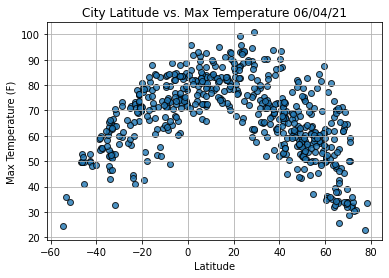

In [38]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

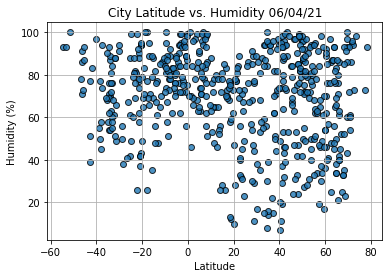

In [39]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

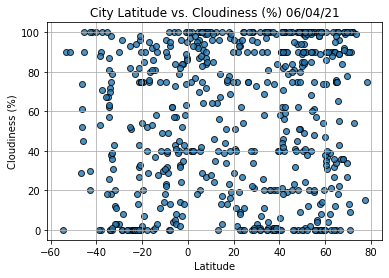

In [40]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

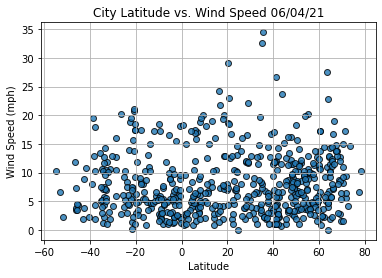

In [41]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()